Programação Probabilística 
=====
e Métodos Bayesianos para Hackers 
========

##### Versão 0.1

`Conteúdo original criado por Cam Davidson-Pilon`

`Transferido para Python 3 e PyMC3 por Max Margenot (@clean_utensils) e Thomas Wiecki (@twiecki) em Quantopian (@quantopian)`
__


Bem-vindo a *Métodos Bayesianos para Hackers*. O repositório Github completo está disponível em [github/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers](https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers). Os outros capítulos podem ser encontrados em [homepage](https://camdavidsonpilon.github.io/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/). Esperamos que você goste do livro e incentivamos qualquer contribuição!
___

Versão pt_BR

Tradução por Rodolpho Macedo dos Santos disponibilizado em [Probabilistic-Programming-and-Bayesian-Methods-for-Hackers](http://github.com/rodolphomacedo/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers)

Capítulo 1
======
***

A filosofia da inferência bayesiana
------

> Você é um programador habilidoso, mas ainda assim existem bugs em seu código. Após uma implementação particularmente difícil de um algoritmo, você decide testar seu código em um exemplo trivial. Ele roda. Você testa o código em um problema mais difícil. Isso roda mais uma vez. E roda no próximo, *ainda mais difícil*, roda também! Você está começando a acreditar que pode não ter bugs no código ...

Se você pensa assim, então parabéns, você já está pensando bayesiano! A inferência bayesiana é simplesmente atualizar suas crenças após considerar novas evidências. Um bayesiano raramente pode ter certeza sobre o resultado, mas pode estar muito confiante. Assim como no exemplo acima, nunca podemos ter 100% de certeza de que nosso código está livre de bugs, a menos que o testemos em todos os problemas possíveis; algo raramente possível na prática. Em vez disso, podemos testá-lo em um grande número de problemas e, se for bem-sucedido, podemos nos sentir mais *confiantes* sobre nosso código, mas ainda não temos certeza. A inferência bayesiana funciona de forma idêntica: atualizamos nossas crenças sobre um resultado; raramente podemos ter certeza absoluta, a menos que excluamos todas as outras alternativas.


### O estado de espírito bayesiano

A inferência bayesiana difere da inferência estatística mais tradicional por preservar a *incerteza*. A princípio, isso soa como uma técnica estatística ruim. As estatísticas não são apenas derivar *certeza* da aleatoriedade? Para reconciliar isso, precisamos começar a pensar como bayesianos.

A visão de mundo bayesiana interpreta a probabilidade como uma medida de *credibilidade em um evento*, ou seja, o quão confiantes estamos na ocorrência de um evento. Na verdade, veremos em um momento que esta é a interpretação natural da probabilidade.

Para que isso fique mais claro, consideramos uma interpretação alternativa da probabilidade: *Frequentista* (ou *Frequencista*), conhecida como a versão mais *clássica* da estatística, assume que a probabilidade é a frequência relativa de eventos no longo prazo (daí o título concedido). Por exemplo, a *probabilidade de acidentes de avião* sob uma filosofia frequentista é interpretada como a *frequência relativa no longo prazo de acidentes de avião*. Isso faz sentido lógico para muitas probabilidades de eventos, mas se torna mais difícil de entender quando os eventos não têm a frequência de ocorrência de longo prazo. Considere: muitas vezes atribuímos probabilidades aos resultados das eleições presidenciais, mas a eleição em si só acontece uma vez! Os frequentistas contornam isso invocando realidades alternativas e dizendo que, em todas essas realidades, a freqüência das ocorrências define a probabilidade.

Os bayesianos, por outro lado, têm uma abordagem mais intuitiva. Os bayesianos interpretam uma probabilidade como uma medida de *crença*, ou a confiança, da ocorrência de um evento. Simplesmente, a probabilidade é um resumo de uma opinião. Um indivíduo que atribui uma crença de $0$ a um evento não tem confiança de que o evento ocorrerá; inversamente, atribuir uma crença de $1$ implica que o indivíduo está absolutamente certo da ocorrência de um evento. Crenças entre $0$ e $1$ permitem ponderações para outros resultados. Esta definição está de acordo com a probabilidade do exemplo do acidente de avião, por termos observado a frequência dos acidentes de avião, a crença de um indivíduo deve ser igual a essa frequência, excluindo qualquer informação externa. Da mesma forma, sob esta definição de probabilidade igualmente a crenças, é significativo dizer que a probabilidade (crença) do resultado das eleições presidenciais: o quão confiante você está, o candidato *A* irá vencer?


Observe no parágrafo acima, atribuímos a medida de crença (probabilidade) a um *indivíduo*, não à Natureza. Isso é muito interessante, pois essa definição abre espaço para crenças conflitantes entre os indivíduos. Novamente, isso é apropriado para o que ocorre naturalmente: diferentes indivíduos têm diferentes crenças sobre os eventos que ocorrem, porque possuem diferentes *informações* sobre o mundo. A existência de diferentes crenças não significa que alguém esteja errado. Considere os seguintes exemplos que demonstram a relação entre crenças e probabilidades individuais:

- - Lanço uma moeda e ambos adivinhamos o resultado. Ambos concordaríamos, supondo que a moeda seja justa, que a probabilidade de cara é $\frac{1}{2}$. Suponha, então, que eu espie a moeda. Agora eu sei com certeza qual é o resultado: eu atribuo probabilidade $1.0$ a cara ou coroa (seja qual for). Agora, qual é a *sua* crença de que a moeda é cara? Meu conhecimento do resultado não mudou os resultados da moeda. Assim, atribuímos diferentes probabilidades ao resultado.

- Seu código tem um bug ou não, mas não sabemos com certeza qual afirmação é verdadeira, embora tenhamos uma crença sobre a presença ou ausência de um bug.

- Um paciente médico está exibindo os sintomas $x$, $y$ e $z$. E existem várias doenças que poderiam estar causando todos esses sintomas, mas apenas uma doença está presente. Um médico tem crenças sobre qual doença, mas um segundo médico pode ter crenças ligeiramente diferentes.

Essa filosofia da abordagem de crenças como probabilidade é natural para os humanos. Nós a utilizamos constantemente à medida que interagimos com o mundo e vemos apenas verdades parciais, mas reunimos evidências para formar as crenças. Alternativamente, você deve ser *treinado* para pensar como um frequentista.

Para nos alinhar com a notação de probabilidade tradicional, denotamos nossa crença sobre o evento $A$ como $P(A)$. Chamamos essa quantidade de *probabilidade a priori*.

John Maynard Keynes, um grande economista e pensador, disse: "Quando os fatos mudam, eu mudo de ideia. O que você faz, senhor?" Esta citação reflete a maneira como um bayesiano atualiza suas crenças depois de ver as evidências. Mesmo &mdash; especialmente &mdash; se a evidência for contrária ao que se acreditava inicialmente, a evidência não pode ser ignorada. Denotamos nossa crença atualizada como $P(A | X)$, interpretada como a probabilidade de $A$ dada a evidência $X$. Chamamos de atualização da crença  da *probabilidade posteriori* para contrastá-la com a probabilidade a priori. Por exemplo, considere as probabilidades a posteriori (leia-se: crenças a posteriori) dos exemplos acima, após observar algumas evidências $X$:

1\. $P(A): \;\;$ a moeda tem 50 por cento de chance de ser cara. $P(A | X):\;\;$ Voce olha para a moeda, 
observa que caiu Cara, denote essa informação $X$ e atribua trivialmente a probabilidade $1.0$ para Cara e $0.0$ para Coroa.

2\.   $P(A): \;\;$ Este é um código grande e complexo, provavelmente contém um bug. $P(A | X): \;\;$ O código passou em todos os testes $X$; ainda pode haver um bug, mas sua presença é menos provável agora.

3\.  $P(A):\;\;$ O paciente pode ter muitas doenças. $P(A | X):\;\;$  Realização de um teste de sangue gerou evidências $X$, descartando algumas das possíveis doenças de consideração.

É claro que em cada exemplo não descartamos completamente a crença a priori depois de ver a nova evidência $X$, mas *reponderamos a priori* para incorporar a nova evidência (ou seja, colocamos mais peso ou confiança em algumas crenças versus outras).

Ao introduzir a incerteza a priori sobre os eventos, já estamos admitindo que qualquer suposição que fizermos é potencialmente muito errada. Depois de observar dados, evidências ou outras informações, atualizamos nossas crenças e nosso palpite de tal modo a se tornar *menos errada*. Este é o lado alternativo da previsão de uma moeda, onde normalmente tentamos estar *mais certos*.


### Inferência Bayesiana na Prática

Se a inferência frequentista e bayesiana fossem funções de programação, com as entradas sendo problemas estatísticos, então as duas seriam diferentes no que retornam ao usuário. A função de inferência frequentista retornaria um número, representando uma estimativa (normalmente uma estatística de resumo como a média da amostra etc.), enquanto a função Bayesiana retornaria as *probabilidades*.


Por exemplo, em nosso problema de debugging acima, chamamos a função frequentista com o argumento "Meu código passou em todos os testes $X$; meu código está livre de erros?" retornaria um *SIM*. Por outro lado, perguntando à nossa função Bayesiana "Muitas vezes meu código tem bugs. Meu código passou em todos os testes $X$; meu código está livre de bugs?" retornaria algo muito diferente: probabilidades de *SIM* e de *NÃO*. A função poderia retornar:

>    *SIM*, com probabilidade de 0,8; *NÃO*, com probabilidade de 0,2

Isso é muito diferente da resposta que a função frequentista retornou. Observe que a função Bayesiana aceita um argumento adicional: *"Freqüentemente meu código tem bugs" *. Este parâmetro é o *a priori*. Ao incluir o parâmetro a priori, estamos dizendo à função bayesiana para incluir nossa crença sobre a situação. Tecnicamente, este parâmetro na função bayesiana é opcional, mas veremos que excluí-lo terá suas consequências.

#### Incorporando evidências

À medida que adquirimos mais e mais exemplos de evidências, nossa crença a priori é *apagada* pelas novas evidências. Isto é o esperado. Por exemplo, se sua crença a priori é algo ridículo, como "Espero que o sol exploda hoje", e a cada dia que você estiver errado, você esperaria que qualquer inferência a corrigisse, ou pelo menos alinhasse melhor suas crenças. A inferência bayesiana corrigirá essa crença.

Denote $N$ como o número de evidências que possuímos. À medida que reunimos uma quantidade *infinita* de evidência, digamos como $N \rightarrow \infty$, nossos resultados bayesianos (frequentemente) se alinham aos resultados frequentistas. Portanto, para $N$ grandes, a inferência estatística é mais ou menos objetiva. Por outro lado, para $N$ pequenos, a inferência é muito mais *instável*: as estimativas frequentistas têm mais variância e intervalos de confiança maiores. É aqui que a análise bayesiana se destaca. Ao introduzir uma probabilidade a priori e retornar (em vez de uma estimativa escalar), *preservamos a incerteza* que reflete a instabilidade da inferência estatística de um pequeno conjunto de dados $N$.

Pode-se pensar que para $N$ grandes, pode-se ficar indiferente entre as duas técnicas, visto que elas oferecem inferência semelhante, e pode-se inclinar para os métodos frequentistas mais simples computacionalmente. Um indivíduo nesta posição deve considerar a seguinte citação de Andrew Gelman (2005)[1], antes de tomar tal decisão:

> Os tamanhos das amostras nunca são grandes. Se $N$ for muito pequeno para obter uma estimativa suficientemente precisa, você precisará obter mais dados (ou fazer mais suposições). Mas uma vez que $N$ é "grande o suficiente", você pode começar a subdividir os dados para aprender mais (por exemplo, em uma pesquisa de opinião pública, depois de ter uma boa estimativa para todo o país, você pode estimar entre homens e mulheres, pessoas do norte e pessoas do sul, diferentes faixas etárias, etc.). $N$ nunca será suficiente porque se fosse "suficiente" você já estaria próximo do problema para o qual precisa de mais dados.

### Os métodos frequentistas estão incorretos então?

**Não.**

Os métodos freqüentistas ainda são úteis ou de última geração em muitas áreas. Ferramentas como regressão linear de mínimos quadrados, regressão LASSO e algoritmos de maximização de expectativa são poderosos e rápidos. Os métodos bayesianos complementam essas técnicas resolvendo problemas que essas abordagens não conseguem ou iluminando o sistema subjacente com uma modelagem mais flexível.


#### Uma nota sobre *Big Data*
Paradoxalmente, os problemas analíticos preditivos de big data são resolvidos por algoritmos relativamente simples [2][4]. Assim, podemos argumentar que a dificuldade de previsão de big data não está no algoritmo usado, mas sim nas dificuldades computacionais de armazenamento e execução em grande conjuntos de dados. (Também se deve considerar a citação de Gelman acima e perguntar "Eu realmente tenho cenário de big data?")

Os problemas analíticos muito mais difíceis envolvem *dados médios* e, especialmente problemáticos, *dados realmente pequenos*. Usando um argumento semelhante ao do Gelman citado acima, se os problemas de big data forem *grandes o suficiente* para serem prontamente resolvidos, então, deveriamos estar muito mais interessados nos conjuntos de dados *não muito grandes*.

### Nossa Estrutura Bayesiana

Estamos interessados em crenças, que podem ser interpretadas como probabilidades pelo pensamento bayesiano. Temos uma crença *a priori* do evento $A$, essas crenças foram formadas por informações anteriores, por exemplo, nossa crença a priori sobre os bugs encontrados em nosso código antes de realizar os testes.

Em segundo lugar, observamos nossas evidências. Para continuar em nosso exemplo do código com bugs: se nosso código passar nos testes $X$, então queremos atualizar nossa crença com essa nova informação. Chamamos essa nova crença de probabilidade *a posteriori*. A atualização de nossa crença é feita por meio da seguinte equação, conhecida como Teorema de Bayes, em homenagem a seu descobridor Thomas Bayes:

\begin{align}
 P( A | X )\;\ =\;\ & \frac{ P(X | A) P(A) } {P(X) } \\\\[5pt]
& \propto P(X | A) P(A)\;\; (\propto \text{é proporcional à })
\end{align}

A fórmula acima não é exclusiva da inferência bayesiana: é um fato matemático com usos fora da inferência bayesiana. A inferência bayesiana apenas a utiliza para conectar as probabilidades a priori $P(A)$ com as probabilidades a posteriori atualizadas $P(A | X)$.

##### Exemplo:  obrigatório exemplo de cara ou coroa

Todo texto de estatísticas deve conter um exemplo de cara ou coroa, vou usá-lo aqui para tirá-lo do caminho. Suponha que, ingenuamente, você não tem certeza sobre a probabilidade de cara em um cara ou coroa (alerta de spoiler: é 50%). Você acredita que existe algum índice subjacente verdadeiro, chame-o de $p$, mas não tem opinião prévia sobre o que $p$ pode ser.

Começamos a jogar uma moeda e registramos as observações: $H$ ou $T$. Estes são os nossos dados observados. Uma pergunta interessante a se fazer é como nossa inferência muda à medida que observamos mais e mais dados? Mais especificamente, como são nossas probabilidades a posteriori quando temos poucos dados, em comparação com quando temos muitos dados.

Abaixo, traçamos uma seqüência de atualização das probabilidades a posteriori à medida que observamos quantidades crescentes de dados (cara ou coroa).

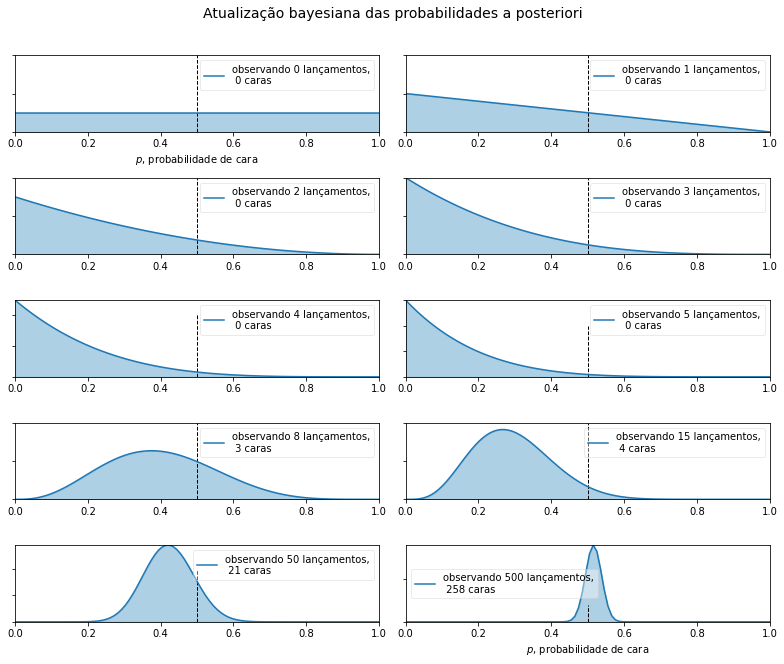

In [5]:
"""
O livro usa um arquivo matplotlibrc personalizado, que fornece estilos exclusivos para
gráficos de matplotlib. Se estiver executando este livro, e você deseja usar o 
estilo do livro, são fornecidas duas opções:
     1. Substitua seu próprio arquivo matplotlibrc com o arquivo rc fornecido no
        styles/dir do livro. Veja http://matplotlib.org/users/customizing.html
     2. Também nos estilos está o arquivo bmh_matplotlibrc.json. Isso pode ser usado para
        atualizar os estilos apenas neste bloco de notas. Tente executar o seguinte código:

        import json
        s = json.load(open("../styles/bmh_matplotlibrc.json"))
        matplotlib.rcParams.update(s)

"""
# O código abaixo pode ser ignorado, pois atualmente não é importante, mais ele
# usa tópicos avançados que ainda não cobrimos. OLHE A FOTO, MICHAEL!

%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
figsize(11, 9)

import scipy.stats as stats

dist = stats.beta
n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 500]
data = stats.bernoulli.rvs(0.5, size=n_trials[-1])
x = np.linspace(0, 1, 100)

# Para os já preparados, estou usando o conjugação a priori da Binomial.
for k, N in enumerate(n_trials):
    sx = plt.subplot(int(len(n_trials)/2), 2, k+1)
    plt.xlabel("$p$, probabilidade de cara") \
        if k in [0, len(n_trials)-1] else None
    plt.setp(sx.get_yticklabels(), visible=False)
    heads = data[:N].sum()
    y = dist.pdf(x, 1 + heads, 1 + N - heads)
    if heads != 1:
        plt.plot(x, y, label="observando %d lançamentos,\n %d caras" % (N, heads))
    else:
        plt.plot(x, y, label="observando %d lançamentos,\n %d cara" % (N, heads))
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)

    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)


plt.suptitle("Atualização bayesiana das probabilidades a posteriori",
             y=1.02,
             fontsize=14)

plt.tight_layout()

As probabilidades a posteriori são representadas pelas curvas, e nossa incerteza é proporcional à largura da curva. Como mostra o gráfico acima, conforme começamos a observar os dados, nossas probabilidades a posteriori começam a se deslocar e se mover. Eventualmente, conforme observamos mais e mais dados (caras ou coroas), nossas probabilidades ficarão cada vez mais estreitas em torno do valor real de $p = 0.5$ (marcado por uma linha tracejada).


Observe que os gráficos nem sempre têm *picos* em 0,5. Não há motivo para isso: lembre-se de que presumimos que não tínhamos uma opinião a priori sobre qual é o valor de $p$. Na verdade, se observarmos dados bastante extremos, digamos 8 lançamentos e apenas 1 cara observada, nossa distribuição pareceria muito tendenciosa *longe* de agrupar em torno de $0.5$ (sem a opinião a priori, quão confiante você se sentiria ao apostar em uma moeda justa após observar 8 coroas e 1 cara?). À medida que mais dados se acumulam, veríamos mais e mais a probabilidade sendo atribuída a $p = 0.5$, embora nunca temos toda ela.

O próximo exemplo é uma demonstração simples da matemática da inferência bayesiana.

##### Exemplo: Bug, ou apenas um recurso agradável e não intencional?


Seja $A$ o evento em que nosso código **não contém  bugs**. Seja $X$ o evento em que o código passa em todos os testes de depuração. Por enquanto, deixaremos a probabilidade a priori de nenhum bug como variável, ou seja, $P(A) = p$.

Estamos interessados em $P(A|X)$, ou seja, a probabilidade de nenhum bug, dados nossos testes de debugging $X$. Para usar a fórmula acima, precisamos calcular algumas quantidades.

O que é $P(X|A)$, ou seja, a probabilidade de que o código passe nos testes $X$ *dado* que não haja bugs? Bem, é igual a 1, pois um código sem bugs passará em todos os testes.

$P(X)$ é um pouco mais complicado: o evento $X$ pode ser dividido em duas possibilidades, o evento $X$ ocorrendo mesmo que nosso código *realmente tenha* bugs (denotado $\sim A\;$, dito *não $A$*), ou evento $X$ sem bugs ($A$).

Assim, $P(X)$ pode ser representado como:

\begin{align}
P(X ) & = P(X \text{ e } A) + P(X \text{ e } \sim A) \\\\[5pt]
 & = P(X|A)P(A) + P(X | \sim A)P(\sim A)\\\\[5pt]
& = P(X|A)p + P(X | \sim A)(1-p)
\end{align}

Já calculamos $P(X|A)$ acima ( $=1$). Por outro lado, $ P(X|\sim A)$ é subjetivo: nosso código pode passar nos testes, mas ainda tem um bug nele, embora a probabilidade de haver um bug seja reduzida. Observe que isso depende do número de testes realizados, do grau de complicação nos testes, etc. Vamos ser conservadores e atribuir $P(X|\sim A) = 0,5$. Então:

\begin{align}
P(A | X) & = \frac{1\cdot p}{ 1\cdot p +0.5 (1-p) } \\\\
& = \frac{p}{ p + 0.5-0.5  p } \\\\
& = \frac{p}{ 0.5 + 0.5 p } \\\\
& = \frac{p}{ 0.5 \cdot ( 1 + p )} \\\\
& = \frac{ 2 p}{1+p}
\end{align}

Esta é a probabilidade a posteriori. A qual se parece como a nossa função a priori, $p \in [0,1]$?

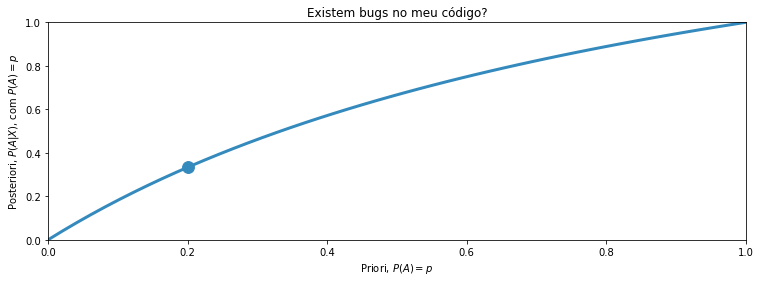

In [10]:
figsize(12.5, 4)
p = np.linspace(0, 1, 50)
plt.plot(p, 2*p/(1+p), color="#348ABD", lw=3)
#plt.fill_between(p, 2*p/(1+p), alpha=.5, facecolor=["#A60628"])
plt.scatter(0.2, 2*(0.2)/1.2, s=140, c="#348ABD")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("Priori, $P(A) = p$")
plt.ylabel("Posteriori, $P(A|X)$, com $P(A) = p$")
plt.title("Existem bugs no meu código?");

Podemos ver os maiores ganhos se observarmos os testes $X$ que passaram quando a probabilidade a priori, $p$, é baixa. Vamos definir um valor específico para a priori. Sou um programador bom (eu acho), então vou me dar uma ideia realista a priori de 0.20, ou seja, há 20% de chance de escrever um código sem bugs. Para ser mais realista, essa prioridade deve ser uma função de quão complicado e grande é o código, mas vamos fixá-lo em 0.20. Então, minha crença atualizada de que meu código está livre de bugs é de 0,33.

Lembre-se de que a priori é uma probabilidade: $p$ é a probabilidade a priori de *não haver bugs*, então $1-p$ é a probabilidade a priori de *ter bugs* no código.

Da mesma forma, nossa posteriori também é uma probabilidade, com $P(A|X)$ a probabilidade de não haver bug *dado que vimos que todos os testes passaram*, portanto $1 - P(A|X)$ é a probabilidade de haver um bug *considerando que todos os testes passaram*. Qual é a nossa probabilidade a posteriori? Abaixo está um gráfico das probabilidades a priori e a posteriori.

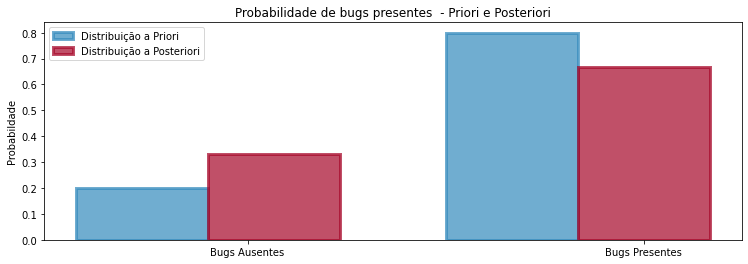

In [27]:
figsize(12.5, 4)
colours = ["#348ABD", "#A60628"]

prior = [0.20, 0.80]
posterior = [1./3, 2./3]
# posterior = [(2*0.2)/(1+0.2),1-(2*0.2)/(1+0.2)] 

plt.bar([0, .7], prior, alpha=0.70, width=0.25,
        color=colours[0], label="Distribuição a Priori",
        lw="3", edgecolor=colours[0])

plt.bar([0+0.25, .7+0.25], posterior, alpha=0.7,
        width=0.25, color=colours[1],
        label="Distribuição a Posteriori",
        lw="3", edgecolor=colours[1])

plt.xticks([0.20, .95], ["Bugs Ausentes", "Bugs Presentes"])
plt.title("Probabilidade de bugs presentes  - Priori e Posteriori")
plt.ylabel("Probabildade")
plt.legend(loc="upper left");

Observe que, depois que observamos a ocorrência de $X$, a probabilidade dos bugs estarem ausentes aumentou. Aumentando o número de testes, podemos nos aproximar da confiança (probabilidade 1) de que não há bugs presentes.

Este foi um exemplo muito simples de inferência bayesiana e da regra de Bayes. Infelizmente, a matemática necessária para realizar inferências bayesianas mais complicadas apenas se torna mais difícil, exceto para casos construídos artificialmente. Veremos mais tarde que esse tipo de análise matemática é realmente desnecessária. Primeiro, devemos ampliar nossas ferramentas de modelagem. A próxima seção trata das *distribuições de probabilidades*. Se você já estiver familiarizado, sinta-se à vontade para pular (ou pelo menos dar uma olhada), mas para os menos familiarizados, a próxima seção é essencial.

_______

## Probability Distributions


**Let's quickly recall what a probability distribution is:** Let $Z$ be some random variable. Then associated with $Z$ is a *probability distribution function* that assigns probabilities to the different outcomes $Z$ can take. Graphically, a probability distribution is a curve where the probability of an outcome is proportional to the height of the curve. You can see examples in the first figure of this chapter. 

We can divide random variables into three classifications:

-   **$Z$ is discrete**: Discrete random variables may only assume values on a specified list. Things like populations, movie ratings, and number of votes are all discrete random variables. Discrete random variables become more clear when we contrast them with...

-   **$Z$ is continuous**: Continuous random variable can take on arbitrarily exact values. For example, temperature, speed, time, color are all modeled as continuous variables because you can progressively make the values more and more precise.

- **$Z$ is mixed**: Mixed random variables assign probabilities to both discrete and continuous random variables, i.e. it is a combination of the above two categories. 

### Discrete Case
If $Z$ is discrete, then its distribution is called a *probability mass function*, which measures the probability $Z$ takes on the value $k$, denoted $P(Z=k)$. Note that the probability mass function completely describes the random variable $Z$, that is, if we know the mass function, we know how $Z$ should behave. There are popular probability mass functions that consistently appear: we will introduce them as needed, but let's introduce the first very useful probability mass function. We say $Z$ is *Poisson*-distributed if:

$$P(Z = k) =\frac{ \lambda^k e^{-\lambda} }{k!}, \; \; k=0,1,2, \dots $$

$\lambda$ is called a parameter of the distribution, and it controls the distribution's shape. For the Poisson distribution, $\lambda$ can be any positive number. By increasing $\lambda$, we add more probability to larger values, and conversely by decreasing $\lambda$ we add more probability to smaller values. One can describe $\lambda$ as the *intensity* of the Poisson distribution. 

Unlike $\lambda$, which can be any positive number, the value $k$ in the above formula must be a non-negative integer, i.e., $k$ must take on values 0,1,2, and so on. This is very important, because if you wanted to model a population you could not make sense of populations with 4.25 or 5.612 members. 

If a random variable $Z$ has a Poisson mass distribution, we denote this by writing

$$Z \sim \text{Poi}(\lambda) $$

One useful property of the Poisson distribution is that its expected value is equal to its parameter, i.e.:

$$E\large[ \;Z\; | \; \lambda \;\large] = \lambda $$

We will use this property often, so it's useful to remember. Below, we plot the probability mass distribution for different $\lambda$ values. The first thing to notice is that by increasing $\lambda$, we add more probability of larger values occurring. Second, notice that although the graph ends at 15, the distributions do not. They assign positive probability to every non-negative integer.

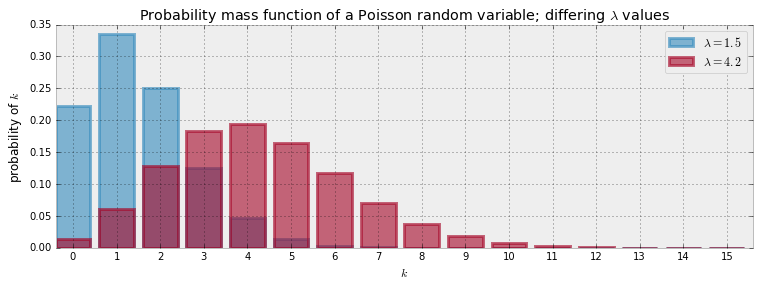

In [4]:
figsize(12.5, 4)

import scipy.stats as stats
a = np.arange(16)
poi = stats.poisson
lambda_ = [1.5, 4.25]
colours = ["#348ABD", "#A60628"]

plt.bar(a, poi.pmf(a, lambda_[0]), color=colours[0],
        label="$\lambda = %.1f$" % lambda_[0], alpha=0.60,
        edgecolor=colours[0], lw="3")

plt.bar(a, poi.pmf(a, lambda_[1]), color=colours[1],
        label="$\lambda = %.1f$" % lambda_[1], alpha=0.60,
        edgecolor=colours[1], lw="3")

plt.xticks(a + 0.4, a)
plt.legend()
plt.ylabel("probability of $k$")
plt.xlabel("$k$")
plt.title("Probability mass function of a Poisson random variable; differing \
$\lambda$ values");

### Continuous Case
Instead of a probability mass function, a continuous random variable has a *probability density function*. This might seem like unnecessary nomenclature, but the density function and the mass function are very different creatures. An example of continuous random variable is a random variable with *exponential density*. The density function for an exponential random variable looks like this:

$$f_Z(z | \lambda) = \lambda e^{-\lambda z }, \;\; z\ge 0$$

Like a Poisson random variable, an exponential random variable can take on only non-negative values. But unlike a Poisson variable, the exponential can take on *any* non-negative values, including non-integral values such as 4.25 or 5.612401. This property makes it a poor choice for count data, which must be an integer, but a great choice for time data, temperature data (measured in Kelvins, of course), or any other precise *and positive* variable. The graph below shows two probability density functions with different $\lambda$ values. 

When a random variable $Z$ has an exponential distribution with parameter $\lambda$, we say *$Z$ is exponential* and write

$$Z \sim \text{Exp}(\lambda)$$

Given a specific $\lambda$, the expected value of an exponential random variable is equal to the inverse of $\lambda$, that is:

$$E[\; Z \;|\; \lambda \;] = \frac{1}{\lambda}$$

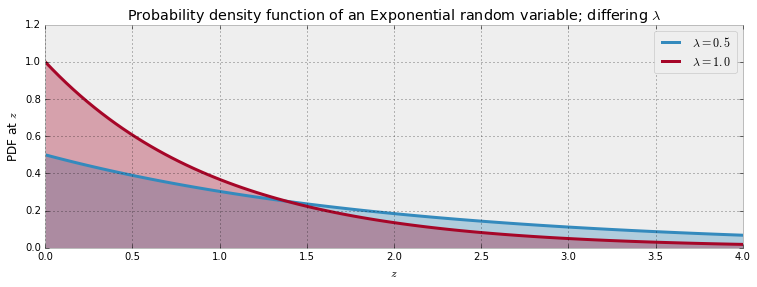

In [5]:
a = np.linspace(0, 4, 100)
expo = stats.expon
lambda_ = [0.5, 1]

for l, c in zip(lambda_, colours):
    plt.plot(a, expo.pdf(a, scale=1./l), lw=3,
             color=c, label="$\lambda = %.1f$" % l)
    plt.fill_between(a, expo.pdf(a, scale=1./l), color=c, alpha=.33)

plt.legend()
plt.ylabel("PDF at $z$")
plt.xlabel("$z$")
plt.ylim(0,1.2)
plt.title("Probability density function of an Exponential random variable;\
 differing $\lambda$");


### But what is $\lambda \;$?


**This question is what motivates statistics**. In the real world, $\lambda$ is hidden from us. We see only $Z$, and must go backwards to try and determine $\lambda$. The problem is difficult because there is no one-to-one mapping from $Z$ to $\lambda$. Many different methods have been created to solve the problem of estimating $\lambda$, but since $\lambda$ is never actually observed, no one can say for certain which method is best! 

Bayesian inference is concerned with *beliefs* about what $\lambda$ might be. Rather than try to guess $\lambda$ exactly, we can only talk about what $\lambda$ is likely to be by assigning a probability distribution to $\lambda$.

This might seem odd at first. After all, $\lambda$ is fixed; it is not (necessarily) random! How can we assign probabilities to values of a non-random variable? Ah, we have fallen for our old, frequentist way of thinking. Recall that under Bayesian philosophy, we *can* assign probabilities if we interpret them as beliefs. And it is entirely acceptable to have *beliefs* about the parameter $\lambda$. 



##### Example: Inferring behaviour from text-message data

Let's try to model a more interesting example, one that concerns the rate at which a user sends and receives text messages:

>  You are given a series of daily text-message counts from a user of your system. The data, plotted over time, appears in the chart below. You are curious to know if the user's text-messaging habits have changed over time, either gradually or suddenly. How can you model this? (This is in fact my own text-message data. Judge my popularity as you wish.)


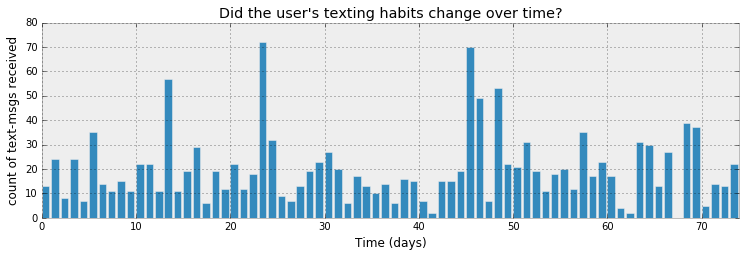

In [6]:
figsize(12.5, 3.5)
count_data = np.loadtxt("data/txtdata.csv")
n_count_data = len(count_data)
plt.bar(np.arange(n_count_data), count_data, color="#348ABD")
plt.xlabel("Time (days)")
plt.ylabel("count of text-msgs received")
plt.title("Did the user's texting habits change over time?")
plt.xlim(0, n_count_data);

Before we start modeling, see what you can figure out just by looking at the chart above. Would you say there was a change in behaviour during this time period? 

How can we start to model this? Well, as we have conveniently already seen, a Poisson random variable is a very appropriate model for this type of *count* data. Denoting day $i$'s text-message count by $C_i$, 

$$ C_i \sim \text{Poisson}(\lambda)  $$

We are not sure what the value of the $\lambda$ parameter really is, however. Looking at the chart above, it appears that the rate might become higher late in the observation period, which is equivalent to saying that $\lambda$ increases at some point during the observations. (Recall that a higher value of $\lambda$ assigns more probability to larger outcomes. That is, there is a higher probability of many text messages having been sent on a given day.)

How can we represent this observation mathematically? Let's assume that on some day during the observation period (call it $\tau$), the parameter $\lambda$ suddenly jumps to a higher value. So we really have two $\lambda$ parameters: one for the period before $\tau$, and one for the rest of the observation period. In the literature, a sudden transition like this would be called a *switchpoint*:

$$
\lambda = 
\begin{cases}
\lambda_1  & \text{if } t \lt \tau \cr
\lambda_2 & \text{if } t \ge \tau
\end{cases}
$$


If, in reality, no sudden change occurred and indeed $\lambda_1 = \lambda_2$, then the $\lambda$s posterior distributions should look about equal.

We are interested in inferring the unknown $\lambda$s. To use Bayesian inference, we need to assign prior probabilities to the different possible values of $\lambda$. What would be good prior probability distributions for $\lambda_1$ and $\lambda_2$? Recall that $\lambda$ can be any positive number. As we saw earlier, the *exponential* distribution provides a continuous density function for positive numbers, so it might be a good choice for modeling $\lambda_i$. But recall that the exponential distribution takes a parameter of its own, so we'll need to include that parameter in our model. Let's call that parameter $\alpha$.

\begin{align}
&\lambda_1 \sim \text{Exp}( \alpha ) \\\
&\lambda_2 \sim \text{Exp}( \alpha )
\end{align}

$\alpha$ is called a *hyper-parameter* or *parent variable*. In literal terms, it is a parameter that influences other parameters. Our initial guess at $\alpha$ does not influence the model too strongly, so we have some flexibility in our choice.  A good rule of thumb is to set the exponential parameter equal to the inverse of the average of the count data. Since we're modeling $\lambda$ using an exponential distribution, we can use the expected value identity shown earlier to get:

$$\frac{1}{N}\sum_{i=0}^N \;C_i \approx E[\; \lambda \; |\; \alpha ] = \frac{1}{\alpha}$$ 

An alternative, and something I encourage the reader to try, would be to have two priors: one for each $\lambda_i$. Creating two exponential distributions with different $\alpha$ values reflects our prior belief that the rate changed at some point during the observations.

What about $\tau$? Because of the noisiness of the data, it's difficult to pick out a priori when $\tau$ might have occurred. Instead, we can assign a *uniform prior belief* to every possible day. This is equivalent to saying

\begin{align}
& \tau \sim \text{DiscreteUniform(1,70) }\\\\
& \Rightarrow P( \tau = k ) = \frac{1}{70}
\end{align}

So after all this, what does our overall prior distribution for the unknown variables look like? Frankly, *it doesn't matter*. What we should understand is that it's an ugly, complicated mess involving symbols only a mathematician could love. And things will only get uglier the more complicated our models become. Regardless, all we really care about is the posterior distribution.

We next turn to PyMC3, a Python library for performing Bayesian analysis that is undaunted by the mathematical monster we have created. 


Introducing our first hammer: PyMC3
-----

PyMC3 is a Python library for programming Bayesian analysis [3]. It is a fast, well-maintained library. The only unfortunate part is that its documentation is lacking in certain areas, especially those that bridge the gap between beginner and hacker. One of this book's main goals is to solve that problem, and also to demonstrate why PyMC3 is so cool.

We will model the problem above using PyMC3. This type of programming is called *probabilistic programming*, an unfortunate misnomer that invokes ideas of randomly-generated code and has likely confused and frightened users away from this field. The code is not random; it is probabilistic in the sense that we create probability models using programming variables as the model's components. Model components are first-class primitives within the PyMC3 framework. 

B. Cronin [5] has a very motivating description of probabilistic programming:

>   Another way of thinking about this: unlike a traditional program, which only runs in the forward directions, a probabilistic program is run in both the forward and backward direction. It runs forward to compute the consequences of the assumptions it contains about the world (i.e., the model space it represents), but it also runs backward from the data to constrain the possible explanations. In practice, many probabilistic programming systems will cleverly interleave these forward and backward operations to efficiently home in on the best explanations.

Because of the confusion engendered by the term *probabilistic programming*, I'll refrain from using it. Instead, I'll simply say *programming*, since that's what it really is. 

PyMC3 code is easy to read. The only novel thing should be the syntax. Simply remember that we are representing the model's components ($\tau, \lambda_1, \lambda_2$ ) as variables.

In [7]:
import pymc3 as pm
import theano.tensor as tt

with pm.Model() as model:
    alpha = 1.0/count_data.mean()  # Recall count_data is the
                                   # variable that holds our txt counts
    lambda_1 = pm.Exponential("lambda_1", alpha)
    lambda_2 = pm.Exponential("lambda_2", alpha)
    
    tau = pm.DiscreteUniform("tau", lower=0, upper=n_count_data - 1)

Applied log-transform to lambda_1 and added transformed lambda_1_log_ to model.
Applied log-transform to lambda_2 and added transformed lambda_2_log_ to model.


In the code above, we create the PyMC3 variables corresponding to $\lambda_1$ and $\lambda_2$. We assign them to PyMC3's *stochastic variables*, so-called because they are treated by the back end as random number generators.

In [8]:
with model:
    idx = np.arange(n_count_data) # Index
    lambda_ = pm.math.switch(tau > idx, lambda_1, lambda_2)

This code creates a new function `lambda_`, but really we can think of it as a random variable: the random variable $\lambda$ from above. The `switch()` function assigns `lambda_1` or `lambda_2` as the value of `lambda_`, depending on what side of `tau` we are on. The values of `lambda_` up until `tau` are `lambda_1` and the values afterwards are `lambda_2`.

Note that because `lambda_1`, `lambda_2` and `tau` are random, `lambda_` will be random. We are **not** fixing any variables yet.

In [9]:
with model:
    observation = pm.Poisson("obs", lambda_, observed=count_data)

The variable `observation` combines our data, `count_data`, with our proposed data-generation scheme, given by the variable `lambda_`, through the `observed` keyword. 

The code below will be explained in Chapter 3, but I show it here so you can see where our results come from. One can think of it as a *learning* step. The machinery being employed is called *Markov Chain Monte Carlo* (MCMC), which I also delay explaining until Chapter 3. This technique returns thousands of random variables from the posterior distributions of $\lambda_1, \lambda_2$ and $\tau$. We can plot a histogram of the random variables to see what the posterior distributions look like. Below, we collect the samples (called *traces* in the MCMC literature) into histograms.

In [10]:
### Mysterious code to be explained in Chapter 3.
with model:
    step = pm.Metropolis()
    trace = pm.sample(10000, tune=5000,step=step)

100%|██████████| 10000/10000 [00:02<00:00, 4511.50it/s]


In [11]:
lambda_1_samples = trace['lambda_1']
lambda_2_samples = trace['lambda_2']
tau_samples = trace['tau']

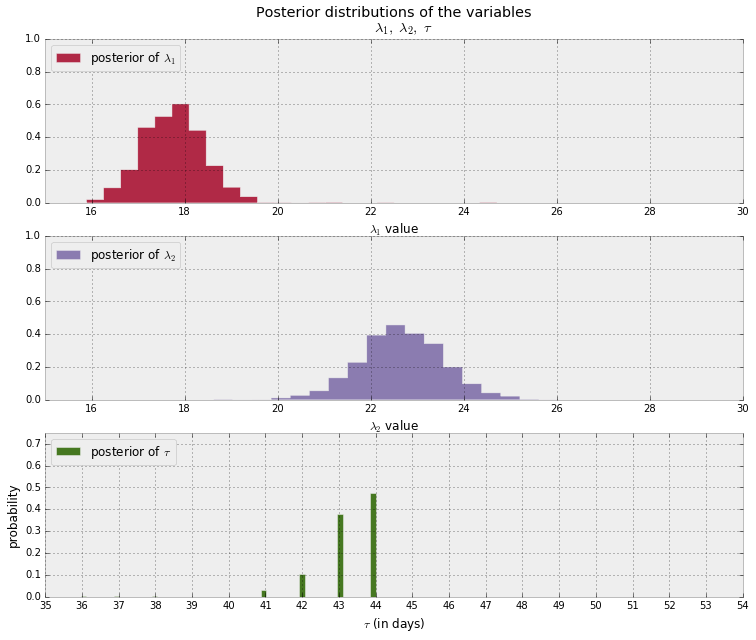

In [12]:
figsize(12.5, 10)
#histogram of the samples:

ax = plt.subplot(311)
ax.set_autoscaley_on(False)

plt.hist(lambda_1_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of $\lambda_1$", color="#A60628", normed=True)
plt.legend(loc="upper left")
plt.title(r"""Posterior distributions of the variables
    $\lambda_1,\;\lambda_2,\;\tau$""")
plt.xlim([15, 30])
plt.xlabel("$\lambda_1$ value")

ax = plt.subplot(312)
ax.set_autoscaley_on(False)
plt.hist(lambda_2_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of $\lambda_2$", color="#7A68A6", normed=True)
plt.legend(loc="upper left")
plt.xlim([15, 30])
plt.xlabel("$\lambda_2$ value")

plt.subplot(313)
w = 1.0 / tau_samples.shape[0] * np.ones_like(tau_samples)
plt.hist(tau_samples, bins=n_count_data, alpha=1,
         label=r"posterior of $\tau$",
         color="#467821", weights=w, rwidth=2.)
plt.xticks(np.arange(n_count_data))

plt.legend(loc="upper left")
plt.ylim([0, .75])
plt.xlim([35, len(count_data)-20])
plt.xlabel(r"$\tau$ (in days)")
plt.ylabel("probability");

### Interpretation

Recall that Bayesian methodology returns a *distribution*. Hence we now have distributions to describe the unknown $\lambda$s and $\tau$. What have we gained? Immediately, we can see the uncertainty in our estimates: the wider the distribution, the less certain our posterior belief should be. We can also see what the plausible values for the parameters are: $\lambda_1$ is around 18 and $\lambda_2$ is around 23. The posterior distributions of the two $\lambda$s are clearly distinct, indicating that it is indeed likely that there was a change in the user's text-message behaviour.

What other observations can you make? If you look at the original data again, do these results seem reasonable? 

Notice also that the posterior distributions for the $\lambda$s do not look like exponential distributions, even though our priors for these variables were exponential. In fact, the posterior distributions are not really of any form that we recognize from the original model. But that's OK! This is one of the benefits of taking a computational point of view. If we had instead done this analysis using mathematical approaches, we would have been stuck with an analytically intractable (and messy) distribution. Our use of a computational approach makes us indifferent to mathematical tractability.

Our analysis also returned a distribution for $\tau$. Its posterior distribution looks a little different from the other two because it is a discrete random variable, so it doesn't assign probabilities to intervals. We can see that near day 45, there was a 50% chance that the user's behaviour changed. Had no change occurred, or had the change been gradual over time, the posterior distribution of $\tau$ would have been more spread out, reflecting that many days were plausible candidates for $\tau$. By contrast, in the actual results we see that only three or four days make any sense as potential transition points. 

### Why would I want samples from the posterior, anyways?


We will deal with this question for the remainder of the book, and it is an understatement to say that it will lead us to some amazing results. For now, let's end this chapter with one more example.

We'll use the posterior samples to answer the following question: what is the expected number of texts at day $t, \; 0 \le t \le 70$ ? Recall that the expected value of a Poisson variable is equal to its parameter $\lambda$. Therefore, the question is equivalent to *what is the expected value of $\lambda$ at time $t$*?

In the code below, let $i$ index samples from the posterior distributions. Given a day $t$, we average over all possible $\lambda_i$ for that day $t$, using $\lambda_i = \lambda_{1,i}$ if $t \lt \tau_i$ (that is, if the behaviour change has not yet occurred), else we use $\lambda_i = \lambda_{2,i}$. 

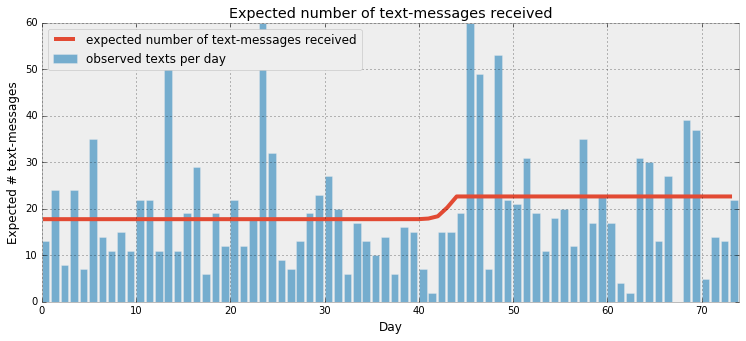

In [13]:
figsize(12.5, 5)
# tau_samples, lambda_1_samples, lambda_2_samples contain
# N samples from the corresponding posterior distribution
N = tau_samples.shape[0]
expected_texts_per_day = np.zeros(n_count_data)
for day in range(0, n_count_data):
    # ix is a bool index of all tau samples corresponding to
    # the switchpoint occurring prior to value of 'day'
    ix = day < tau_samples
    # Each posterior sample corresponds to a value for tau.
    # for each day, that value of tau indicates whether we're "before"
    # (in the lambda1 "regime") or
    #  "after" (in the lambda2 "regime") the switchpoint.
    # by taking the posterior sample of lambda1/2 accordingly, we can average
    # over all samples to get an expected value for lambda on that day.
    # As explained, the "message count" random variable is Poisson distributed,
    # and therefore lambda (the poisson parameter) is the expected value of
    # "message count".
    expected_texts_per_day[day] = (lambda_1_samples[ix].sum()
                                   + lambda_2_samples[~ix].sum()) / N


plt.plot(range(n_count_data), expected_texts_per_day, lw=4, color="#E24A33",
         label="expected number of text-messages received")
plt.xlim(0, n_count_data)
plt.xlabel("Day")
plt.ylabel("Expected # text-messages")
plt.title("Expected number of text-messages received")
plt.ylim(0, 60)
plt.bar(np.arange(len(count_data)), count_data, color="#348ABD", alpha=0.65,
        label="observed texts per day")

plt.legend(loc="upper left");

Our analysis shows strong support for believing the user's behavior did change ($\lambda_1$ would have been close in value to $\lambda_2$ had this not been true), and that the change was sudden rather than gradual (as demonstrated by $\tau$'s strongly peaked posterior distribution). We can speculate what might have caused this: a cheaper text-message rate, a recent weather-to-text subscription, or perhaps a new relationship. (In fact, the 45th day corresponds to Christmas, and I moved away to Toronto the next month, leaving a girlfriend behind.)


##### Exercises

1\.  Using `lambda_1_samples` and `lambda_2_samples`, what is the mean of the posterior distributions of $\lambda_1$ and $\lambda_2$?

In [14]:
#type your code here.

2\.  What is the expected percentage increase in text-message rates? `hint:` compute the mean of `lambda_1_samples/lambda_2_samples`. Note that this quantity is very different from `lambda_1_samples.mean()/lambda_2_samples.mean()`.

In [15]:
#type your code here.

3\. What is the mean of $\lambda_1$ **given** that we know $\tau$ is less than 45.  That is, suppose we have been given new information that the change in behaviour occurred prior to day 45. What is the expected value of $\lambda_1$ now? (You do not need to redo the PyMC3 part. Just consider all instances where `tau_samples < 45`.)

In [16]:
#type your code here.

### References


-  [1] Gelman, Andrew. N.p.. Web. 22 Jan 2013. [N is never large enough](http://andrewgelman.com/2005/07/31/n_is_never_larg).
-  [2] Norvig, Peter. 2009. [The Unreasonable Effectiveness of Data](http://static.googleusercontent.com/media/research.google.com/en//pubs/archive/35179.pdf).
- [3] Salvatier, J, Wiecki TV, and Fonnesbeck C. (2016) Probabilistic programming in Python using PyMC3. *PeerJ Computer Science* 2:e55 <https://doi.org/10.7717/peerj-cs.55>
- [4] Jimmy Lin and Alek Kolcz. Large-Scale Machine Learning at Twitter. Proceedings of the 2012 ACM SIGMOD International Conference on Management of Data (SIGMOD 2012), pages 793-804, May 2012, Scottsdale, Arizona.
- [5] Cronin, Beau. "Why Probabilistic Programming Matters." 24 Mar 2013. Google, Online Posting to Google . Web. 24 Mar. 2013. <https://plus.google.com/u/0/107971134877020469960/posts/KpeRdJKR6Z1>.

In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()